In [18]:
import re
t = 'I love you=====-----?'
t = re.sub(r"\=+","",t)
t

'I love you-----?'

In [19]:
import pandas as pd
def is_chinese(string):
    """
    检查整个字符串是否包含中文
    :param string: 需要检查的字符串
    :return: bool
    """
    for ch in string:
        if u'\u4e00' <= ch <= u'\u9fff':
            # print(string)
            return True

    return False
source = pd.read_csv('source_all')
print(source)
# source = source[source['Abstract'].notna()]
# print(source)
source['Abstract'] = source['Abstract'].map(lambda x: pd.NA if is_chinese(x) == True else x)
source = source[source['Abstract'].notna()]
# source = source[source['Abstract'].str]
print(source)
source.to_csv("source_all_english", index=False)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_19620/1539041146.py:14 in <module>                                                │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_19620/1539041146.py'                        │
│                                                                                                  │
│ /home/linzhisheng/esg-env/lib/python3.7/site-packages/pandas/io/parsers.py:688 in read_csv       │
│                                                                                                  │
│    685 │   │   skip_blank_lines=skip_blank_lines,                                                │
│    686 │   )                                                                                     │
│    687 │                                                                                         │
│ ❱  688 │   return _read(filepath_or_buffer, kwds)                                                │
│    689                                                                                           │
│    690                                                                                           │
│    691 @Appender(                                                                                │
│                                                                                                  │
│ /home/linzhisheng/esg-env/lib/python3.7/site-packages/pandas/io/parsers.py:460 in _read          │
│                                                                                                  │
│    457 │   │   return parser                                                                     │
│    458 │                                                                                         │
│    459 │   try:                                                                                  │
│ ❱  460 │   │   data = parser.read(nrows)                                                         │
│    461 │   finally:                                                                              │
│    462 │   │   parser.close()                                                                    │
│    463                                                                                           │
│                                                                                                  │
│ /home/linzhisheng/esg-env/lib/python3.7/site-packages/pandas/io/parsers.py:1198 in read          │
│                                                                                                  │
│   1195 │                                                                                         │
│   1196 │   def read(self, nrows=None):                                                           │
│   1197 │   │   nrows = _validate_integer("nrows", nrows)                                         │
│ ❱ 1198 │   │   ret = self._engine.read(nrows)                                                    │
│   1199 │   │                                                                                     │
│   1200 │   │   # May alter columns / col_dict                                                    │
│   1201 │   │   index, columns, col_dict = self._create_index(ret)                                │
│                                                                                                  │
│ /home/linzhisheng/esg-env/lib/python3.7/site-packages/pandas/io/parsers.py:2157 in read          │
│                                                                                                  │
│   2154 │                                                                                         │
│   2155 │   def read(self, nrows=None):                                                           │
│   2156 │   │   try:                                        

In [11]:
from datasets import load_from_disk
from datasets import disable_caching
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('/home/linzhisheng/esg/mlm/roberta-esg-tokenizer')
disable_caching()
t = load_from_disk('mask_datasets_80_10_10_all')
# print(tokenizer.decode(t[0]['input_ids']))
train = t['train'].select(range(100,102))
print(train[1])
# downsampled_dataset = t.train_test_split(
#         train_size=4000000, test_size=400000, seed=42
#     )
# downsampled_dataset.save_to_disk('mask_datasets_80_10_10_all')
# print(downsampled_dataset)



{'input_ids': [11070, 4, 569, 409, 1097, 2265, 1149, 284, 1006, 16, 12718, 16, 10471, 409, 272, 318, 2307, 1112, 381, 497, 381, 1229, 1097, 2265, 1149, 284, 409, 318, 2307, 1112, 3709, 272, 30335, 681, 4, 4, 4, 3642, 4094, 286, 24482, 16, 5005, 4, 569, 275, 50201, 43817, 13219, 1539, 3709, 272, 1151, 4, 4, 705, 381, 562, 381, 387, 30335, 681, 39864, 11262, 4, 3642, 4094, 286, 4, 3360, 1432, 286, 11576, 40108, 3226, 3263, 823, 409, 1097, 2265, 1149, 284, 4636, 409, 318, 2307, 1112, 3709, 609, 381, 2414, 4, 707, 8222, 337, 691, 4443, 561, 9875, 3709, 691, 28486, 3709, 691, 4549, 345, 510, 284, 2704, 2887, 25909, 381, 2, 0, 4, 275, 30086, 387, 898, 406, 379, 4, 528, 352, 1282, 409, 272, 829], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
from transformers import AutoTokenizer
import random
tokenizer = AutoTokenizer.from_pretrained('roberta-esg-tokenizer')
input = ''
for i in range(700):
    input = input + 'good '
len(tokenizer(input)['input_ids'])

Token indices sequence length is longer than the specified maximum sequence length for this model (703 > 512). Running this sequence through the model will result in indexing errors


703

In [ ]:
a = {
    'a':2,
    'b':5,
    'c':1
}
# a.items()
print(sorted(a.items(), key = lambda x:x[1],reverse = True))


[('a', 2), ('b', 5), ('c', 1)]


(-0.5, 399.5, 199.5, -0.5)

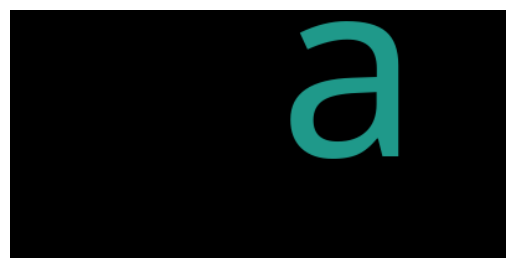

In [ ]:
#!/usr/bin/env python
"""
Minimal Example
===============
Generating a square wordcloud from the US constitution using default arguments.
"""

import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)


# Read the whole text.
# inasd = {('it', 2691), ('report', 2585), ('the', 2551), ('association', 2533), ('company', 2495), ('one', 2478), ('employees', 2466), ('group', 2463), ('policy', 2454), ('operations', 2441), ('us', 2410), ('diversity', 2392), ('all', 2366), ('shareholders', 2352), ('business', 2348), ('meeting', 2330), ('directors', 2327), ('total', 2327), ('information', 2317), ('rights', 2301), ('code', 2296), ('and', 2284), ('conduct', 2275), ('responsibility', 2254), ('foundation', 2252), ('environment', 2247), ('up', 2244), ('inclusion', 2233), ('integrity', 2217), ('status', 2213), ('first', 2213), ('control', 2208), ('commitment', 2202), ('people', 2202), ('no', 2188), ('customers', 2185), ('who', 2182), ('compliance', 2179), ('purpose', 2173), ('safety', 2167), ('management', 2166), ('sustainability', 2166), ('bylaws', 2165), ('society', 2164), ('reporting', 2158), ('st', 2152), ('change', 2150), ('life', 2138), ('capital', 2129), ('board', 2122), ('committee', 2120), ('care', 2120), ('review', 2119), ('as', 2119), ('practices', 2117), ('principles', 2116), ('an', 2116), ('energy', 2110), ('suppliers', 2103), ('development', 2099), ('co', 2091), ('best', 2090), ('director', 2089), ('vision', 2086), ('communities', 2084), ('responsibilities', 2080), ('others', 2069), ('ethics', 2068), ('impact', 2056), ('data', 2055), ('rules', 2050), ('performance', 2039), ('trust', 2032), ('strategy', 2030), ('role', 2027), ('services', 2025), ('this', 2017), ('risks', 2016), ('approach', 2014), ('composition', 2011), ('work', 2011), ('protection', 2011), ('bank', 2002), ('officers', 1992), ('contents', 1991), ('commitments', 1984), ('that', 1982), ('incorporation', 1979), ('action', 1974), ('organization', 1972), ('system', 1972), ('act', 1970), ('corporation', 1964), ('world', 1964), ('charter', 1962), ('statement', 1957), ('lead', 1955), ('equality', 1950), ('shares', 1946)}

# Generate a word cloud image
wordcloud = WordCloud(width=400).generate_from_frequencies({'a':1000})
wordcloud.to_file("wordcloud.png")
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

In [ ]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "3"
from sklearn.feature_extraction.text import CountVectorizer
from transformers import AutoModelForMaskedLM
from transformers import AutoTokenizer
from transformers import pipeline
from keybert import KeyBERT
from flair.embeddings import TransformerDocumentEmbeddings
import pandas as pd
import torch
import numpy as np
import spacy
from wordcloud import WordCloud
nlp = spacy.load('en_core_web_sm')

def predict(model, tokenizer, source,topk):
    print(topk)
    TEMPLATES = [
        # 'The Keyword is <mask>.',
        # 'The keyword is <mask>.',
        # 'In summary, the related word is <mask>.',
        # 'In summary, the keyword is <mask>.',
        # '<mask> is the related word. ',
        # '<mask> is the keyphrase. ',
        '<mask> is the keyword. ',
        # 'In summary, <mask> is the keyphrase. ',
        # 'In summary, <mask> is the keyword. ',
        # 'In summary, <mask> is the related word. ',
        # 'All in all, <mask> is the keyword. ',
        # 'All in all, <mask> is the related word. '
    ]
    average_radio = 0
    result = {}
    first = 1
    for input in source:
        # input_list = input.replace(',', '').replace('.', '').split(' ')
        # input_list = [s.lower() for s in input_list]
        # print(input_list)
        # print(print(input))
        for T in TEMPLATES:
            mask_input = T + input
            inputs = tokenizer(
                mask_input, return_tensors="pt", truncation=True).to(torch.device('cuda:0'))
            # print(inputs)
            token_logits = model(**inputs).logits
            # Find the location of [MASK] and extract its logits
            mask_token_index = torch.where(
                inputs["input_ids"] == tokenizer.mask_token_id)[1]
            # print(token_logits.shape)
            mask_token_logits = token_logits[0, mask_token_index, :]
            # Pick the [MASK] candidates with the highest logits
            top_tokens = torch.topk(
                mask_token_logits, topk, dim=1).indices[0].tolist()
            # print(top_tokens)
            top_tokens_list = tokenizer.decode(top_tokens).split(' ')
            top_tokens_list.pop(0)
            top_tokens_list = [s.lower() for s in top_tokens_list]

            for token in top_tokens_list:
                if token in result.keys():
                    result[token] = result[token] + 1
                else:
                    result[token] = 1
            # intersect = set(input_list) & set(top_tokens_list)
            # average_radio = average_radio + \
            #     len(intersect)/len(input_list)/len(source)
            # print(f"{T}:intersect:{intersect}, radio is {len(intersect)/len(input_list)}\n")
            
            # print(f"{T}:{top_tokens_list}")
            
            # for doc in nlp.pipe(top_tokens_list):
            #     for token in doc:
            #         print(token.tag_)
            # join_word = ''.join(x + ' ' for x in top_tokens_list)
            # classified = ZSC.text_labels(join_word, candidate_labels)
            # print(f'template:{T} res:{classified}\n')
            # for token in top_5_tokens:
            # print(f"{T}, keyword is [{tokenizer.decode(top_tokens)}]")
            # res = tokenizer(input)
            # output = model(**res)
            # print(output)

            # preds = mask_filler(mask_input)
            # for pred in preds:
            #     print(f">>> {pred['token_str']} >>> score is {pred['score']}")
        # print('\n\n==================================================')
    # print(f'average:{average_radio}')
    print(len(result))
    wordcloud = WordCloud(width=1600, height=1600,background_color="white",max_words = 10000).generate_from_frequencies(result)
    wordcloud.to_file('wordcloud.png')

    # print(f'top-k is {topk}, res is: {sorted(result.items(), key = lambda x:x[1],reverse = True)[:1000]}')
    # using key bert
    # hf_model = pipeline("feature-extraction", model=model, tokenizer = tokenizer)
    # kw_model = KeyBERT(model = hf_model)

    # keywords = kw_model.extract_keywords(input, top_n = 100)
    # print(keywords)
    # print(len(keywords))
def test_predict():
    esg_tokenizer = AutoTokenizer.from_pretrained('roberta-esg-tokenizer')
    # ori_tokenizer = AutoTokenizer.from_pretrained('roberta-large')
    source = pd.read_csv('source_all_english', nrows=100000)
    source = source[40000:41000]
    input = []
    input.append("Interpublics Directors are elected each year by Interpublics stockholders at the annual meeting of stockholders. Interpublics Corporate Governance Committee recommends nominees to the Board of Directors, and the Board proposes a slate of nominees to the stockholders for election.")
    input.append('To contribute to climate change mitigation, we actively explore opportunities to support local renewable energy generation. Solar panels are installed at Hang Seng 113 to generate renewable energy.')
    input = source['Abstract'].tolist()
    # model = AutoModelForMaskedLM.from_pretrained(local)
    # origin_model = AutoModelForMaskedLM.from_pretrained('roberta-large').to(torch.device('cuda:0'))
    random_mask_model = AutoModelForMaskedLM.from_pretrained('esg-roberta-random-model').to(torch.device('cuda:0'))
    # predict(origin_model, ori_tokenizer, input)
    # for i in range(3):
    #     predict(origin_model, ori_tokenizer, input, 100*pow(10,i))
        
    for i in range(1):
        predict(random_mask_model, esg_tokenizer, input, 100*pow(10,i))

test_predict()
    # predict(model)

100
1407


In [ ]:
from transformers import AutoTokenizer
import torch
from transformers import AutoModelForMaskedLM
model = AutoModelForMaskedLM.from_pretrained('yiyanghkust/finbert-pretrain')
t = AutoTokenizer.from_pretrained('yiyanghkust/finbert-pretrain')
t.mask_token


Downloading:   0%|          | 0.00/359 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of the model checkpoint at yiyanghkust/finbert-pretrain were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

'[MASK]'

In [56]:
from transformers import AutoTokenizer
import torch
import random
tokenizer = AutoTokenizer.from_pretrained('roberta-esg-tokenizer')
text = '  '
# print(tokenizer(' Table'))
print(text.find('Ġ'))
print(tokenizer(text))
print(tokenizer.convert_ids_to_tokens(225))
# # for i in range(100):
# #     ran = random.randint(0,50264)
# #     token = tokenizer.convert_ids_to_tokens(ran)
# #     if token.find('Ġ') == 0:
# #         print((token,token[1:]))
# # print(token.find('Ġ'))
mask_text = ''
for i in range(len(tokenizer(text)['input_ids']) - 2):
    while 1:
        ran = random.randint(0, 50264)
        random_token = tokenizer.convert_ids_to_tokens(ran)
        if random_token.find('Ġ') == 0:
            mask_text = mask_text + ' ' + random_token[1:]
            break
mask_text


1
{'input_ids': [0, 225, 133, 259, 2], 'attention_mask': [1, 1, 1, 1, 1]}
Ġ


' Connect Sverige JointStock'